In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema
from scipy import signal
import librosa.feature as ft
from pandas import Series

In [2]:
def avg_rising(GSR_vals, t):
    index = 1
    interval = np.array([])
    print(np.shape(GSR_vals)[0])
    while index < np.shape(GSR_vals)[0]:
        if GSR_vals[index] > GSR_vals[index-1]:
            init_time = t[index]
            while GSR_vals[index] > GSR_vals[index-1] and index < np.shape(GSR_vals)[0] -1:
                index+=1
            final_time = t[index-1]
            interval = np.append(interval, (final_time-init_time)*0.001)
        index+=1
    return np.mean(interval)

In [3]:
def find_small_spectral_pow(GSR_vals,t):
    fs = 1/(np.mean(np.diff(t))*0.001)
    freq, spectra = signal.periodogram(GSR_vals, fs)
    freq = freq[0:82]
    spectra = spectra[0:82]
    return freq, np.log(spectra)/np.log(10)

In [4]:
def find_spectral_pow(GSR_vals,t):
    fs = 1/(np.mean(np.diff(t))*0.001)
    freq, spectra = signal.periodogram(GSR_vals, fs)
    freq = freq[0:488]
    spectra = spectra[0:488]
    return freq, np.log(spectra)/np.log(10)

In [5]:
def get_SCSR(normalized_GSR_vals, t):
    fs = 1/(np.mean(np.diff(t))*0.001)
    fc = 0.2
    norm_fc = fc/(fs/2)
    b, a = signal.butter(5, norm_fc, 'low')
    output = signal.filtfilt(b, a, normalized_GSR_vals)
    return output

In [6]:
def get_SCVSR(normalized_GSR_vals, t):
    fs = 1/(np.mean(np.diff(t))*0.001)
    fc = 0.08
    norm_fc = fc/(fs/2)
    b, a = signal.butter(5, norm_fc, 'low')
    output = signal.filtfilt(b, a, normalized_GSR_vals)
    return output

In [7]:
GSR = pd.read_csv('/home/afzalrao/Desktop/Programs/Signal Processing/BARC/Working Stuff/DATA/SHARAD/sharad_**.csv')

In [8]:
GSR_vals = GSR['GSR']
t = GSR['TIME']
GSR_vals = np.array(GSR_vals, dtype = float)
t = np.array(t, dtype = float)

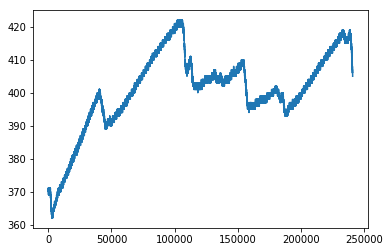

In [9]:
plt.plot(t, GSR_vals)
plt.show()

In [10]:
#Lets get onto extraction of features :->

"""1. Mean Skin Resistance
   2. Mean of first derivatives of skin resistance
   3. Mean of absolute values of first derivatives of skin resistance
   4. Mean first derivative for negative values only
   5. Percentage of time with negative first derivative
   6. Standard deviation of skin resistance
   7. Average number of local minima in the skin conductance signal
   8. Average rising time of the GSR signal
   9-12. Log power density estimates; 4 sub-bands in the [0-0.4] Hz band
   13. Standard deviation of skin conductance
   14. Mean of first derivatives of skin conductance
   15. Mean of absolute values of first derivatives of skin conductance
   16. Mean of absolute values of second derivatives of skin conductance
   17. Average number of local minima in the skin resistance signal
   18-27. Log power density estimates; 10 sub-bands in the [0-2.4] Hz band
   28. Zero crossing rate of skin conductance low response ([0-0.2] Hz)
   29. Mean skin conductance low response peak magnitude
   30. Zero crossing rate of skin conductance very slow response ([0-0.08] Hz)
   31. Mean skin conductance very low response peak magnitude
"""

'1. Mean Skin Resistance\n   2. Mean of first derivatives of skin resistance\n   3. Mean of absolute values of first derivatives of skin resistance\n   4. Mean first derivative for negative values only\n   5. Percentage of time with negative first derivative\n   6. Standard deviation of skin resistance\n   7. Average number of local minima in the skin conductance signal\n   8. Average rising time of the GSR signal\n   9-12. Log power density estimates; 4 sub-bands in the [0-0.4] Hz band\n   13. Standard deviation of skin conductance\n   14. Mean of first derivatives of skin conductance\n   15. Mean of absolute values of first derivatives of skin conductance\n   16. Mean of absolute values of second derivatives of skin conductance\n   17. Average number of local minima in the skin resistance signal\n   18-27. Log power density estimates; 10 sub-bands in the [0-2.4] Hz band\n   28. Zero crossing rate of skin conductance low response ([0-0.2] Hz)\n   29. Mean skin conductance low response

In [11]:
if np.isnan(np.sum(GSR_vals)):
    GSR_vals = GSR_vals[~np.isnan(GSR_vals)]
    t = t[~np.isnan(t)]
t = t[1:]

In [12]:
c_GSR_vals = GSR_vals
GSR_vals= 1/GSR_vals
mean_skin_res = np.mean(GSR_vals) #1.
der = (np.diff(GSR_vals)/np.diff(t))*1000
t_new = t[1:]
double_der = (np.diff(der)/np.diff(t_new))*1000
mean_der = np.mean(der) #2.
mean_abs_der = np.mean(np.abs(der)) #3.
neg_der = np.array([])
for el in der:
    if el < 0:
        neg_der = np.append(neg_der, el)
neg_mean_der = np.mean(neg_der) #4.
perc_neg_der = (np.shape(neg_der)[0]/np.shape(der)[0])*100 #5.
std_skin_res = np.std(GSR_vals) #6.
num_c_min = np.shape(argrelextrema(np.array(c_GSR_vals), np.less))[1] #7.
avg_rising_t = avg_rising(c_GSR_vals, t) #8.
small_freq, small_spectral_power = find_small_spectral_pow(GSR_vals, t) 
idx = np.round(np.linspace(0, len(small_freq) - 1, 4)).astype(int)
small_freq = small_freq[idx]
small_spectral_power = small_spectral_power[idx] #9-12.
std_skin_c = np.std(c_GSR_vals) #13.
c_der = np.diff(c_GSR_vals)/np.diff(t)
mean_c_der = np.mean(c_der) #14.
mean_abs_c_der = np.mean(np.abs(c_der)) #15.
double_c_der = np.diff(c_der)/np.diff(t_new) 
mean_double_c_abs_der = np.mean(np.abs(double_c_der)) #16.
num_min = np.shape(argrelextrema(np.array(GSR_vals), np.less))[1] #17.
freq, spectral_power = find_spectral_pow(GSR_vals, t)
idx = np.round(np.linspace(0, len(freq) - 1, 10)).astype(int)
freq = freq[idx]
spectral_power = spectral_power[idx] #18-27.
normalized_GSR_vals = (c_GSR_vals-np.amin(c_GSR_vals))/(np.amax(c_GSR_vals) - np.amin(c_GSR_vals)) #Normalized Data for SCSR, SCVSR
SCSR = get_SCSR(normalized_GSR_vals, t)
SCVSR = get_SCVSR(normalized_GSR_vals, t)
zcr_SCSR = ft.zero_crossing_rate(SCSR) #28.
Mean_SCSR = np.mean(SCSR) #29.
zcr_SCVSR = ft.zero_crossing_rate(SCVSR) #30.
Peak_SCVSR = np.amax(SCVSR) #31.

76539


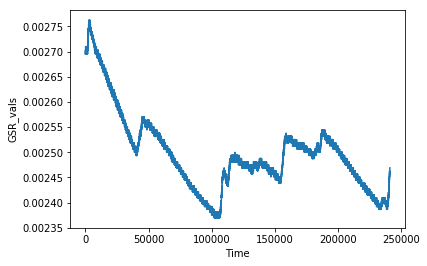

In [13]:
plt.xlabel("Time")
plt.ylabel("GSR_vals")
plt.plot(t, GSR_vals)

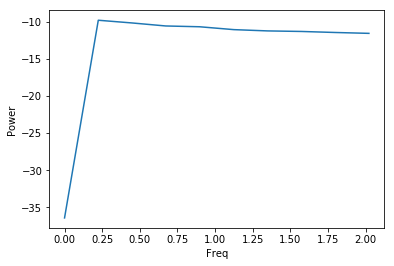

In [14]:
plt.xlabel("Freq")
plt.ylabel("Power")
plt.plot(freq, spectral_power)

In [15]:
print(zcr_SCSR)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]]


In [16]:
print(zcr_SCVSR)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]]


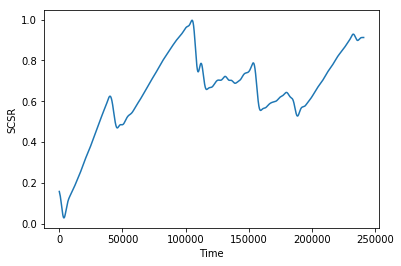

In [17]:
plt.xlabel("Time")
plt.ylabel("SCSR")
plt.plot(t, SCSR)

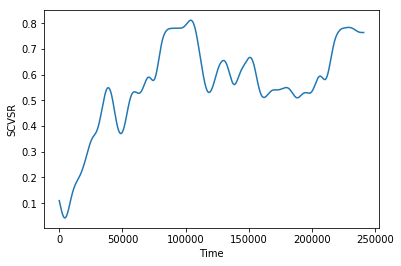

In [18]:
plt.xlabel("Time")
plt.ylabel("SCVSR")
plt.plot(t, SCVSR)

In [26]:
df = {'Mean_Skin_Resistance': mean_skin_res, 'Mean_Res_Derivative': mean_der, 'Mean_Res_Neg_Derivative': neg_mean_der, 'Percentage_of_Neg_Derivative_Samp': perc_neg_der, 'Std_Res': std_skin_res,  'No_of_Local_Minima_Skin_Cond': num_c_min, 'Avg_Rising_Time': avg_rising_t, 'Log_Power_Dens_0_to_0.4Hz': [small_freq, small_spectral_power], 'Std_Cond': std_skin_c,'Mean_Cond_Derivatives': mean_c_der,'Mean_Abs_Cond_Derivatives': mean_abs_c_der,'Mean_Abs_Cond_Second_Derivatives': mean_double_c_abs_der,'Num_Min_Res':num_min,'Log_Power_Dens_0_to_2.4Hz':[freq,spectral_power],'zcr_SCSR': zcr_SCSR,'Mean_SCSR':Mean_SCSR,'zcr_SCVSR':zcr_SCVSR,'Peak_SCVSR':Peak_SCVSR}

In [27]:
df = pd.Series(df)
df.to_csv('/home/afzalrao/Desktop/Programs/Signal Processing/BARC/Working Stuff/DATA/SHARAD/Extract_GSR_Sharad_**.csv')